In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd

high_correlations = pd.read_csv('high_correlations.csv')
target_variable = high_correlations['market_value_capped']
high_correlations = high_correlations.drop(columns=['market_value_capped'])
X_train, X_test, y_train, y_test = train_test_split(high_correlations, target_variable, test_size=0.2, random_state=42)


pca_10principal = pd.read_csv('pca_10component.csv')
target_variable = pca_10principal['market_value_capped'] # The target_variable column has the same values despite being re-assigned btwn both datasets.
pca_10principal = pca_10principal.drop(columns=['market_value_capped'])
PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = train_test_split(pca_10principal, target_variable, test_size=0.2, random_state=42)

# Naively Applying Regression Models

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_model_score = lin_model.score(X_test, y_test)
lin_model_rmse = root_mean_squared_error(lin_model.predict(X_test), y_test)
print("HIGH_CORR_LIN_MODEL:", lin_model_score)
print("HIGH_CORR_LIN_MODEL RMSE:", lin_model_rmse)

pca_lin_model = LinearRegression()
pca_lin_model.fit(PCA_X_train, PCA_y_train)
pca_lin_model_score = pca_lin_model.score(PCA_X_test, PCA_y_test)
pca_lin_model_rmse = root_mean_squared_error(pca_lin_model.predict(PCA_X_test), PCA_y_test)
print("PCA_LIN_MODEL:", pca_lin_model_score)
print("PCA_LIN_MODEL RMSE:", pca_lin_model_rmse)

HIGH_CORR_LIN_MODEL: 0.963546758416098
HIGH_CORR_LIN_MODEL RMSE: 14827.419446436163
PCA_LIN_MODEL: 0.9182408285388849
PCA_LIN_MODEL RMSE: 22205.764889759692


In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)
decision_model_score = decision_model.score(X_test, y_test)
decision_model_rmse = root_mean_squared_error(decision_model.predict(X_test), y_test)

print("HIGH_CORR_DEC_MODEL:", decision_model_score)
print("HIGH_CORR_DEC_MODEL RMSE:", decision_model_rmse)

pca_decision_model = DecisionTreeRegressor()
pca_decision_model.fit(PCA_X_train, PCA_y_train)
pca_decision_model_score = pca_decision_model.score(PCA_X_test, PCA_y_test)
pca_decision_model_rmse = root_mean_squared_error(pca_decision_model.predict(PCA_X_test), PCA_y_test)
print("PCA_DEC_MODEL:", pca_decision_model_score)
print("PCA_DEC_MODEL RMSE:", pca_decision_model_rmse)

HIGH_CORR_DEC_MODEL: 0.9933501827043091
HIGH_CORR_DEC_MODEL RMSE: 6332.89595615764
PCA_DEC_MODEL: 0.9260413263200209
PCA_DEC_MODEL RMSE: 21119.90953168081


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_model_score = forest_model.score(X_test, y_test)
forest_model_rmse = root_mean_squared_error(forest_model.predict(X_test), y_test)
print("HIGH_CORR_FOREST_MODEL:", forest_model_score)
print("HIGH_CORR_FOREST_MODEL RMSE:", forest_model_rmse)

pca_forest_model = RandomForestRegressor()
pca_forest_model.fit(PCA_X_train, PCA_y_train)
pca_forest_model_score = pca_forest_model.score(PCA_X_test, PCA_y_test)
pca_forest_model_rmse = root_mean_squared_error(pca_forest_model.predict(PCA_X_test), PCA_y_test)
print("PCA_FOREST_MODEL:", pca_forest_model_score)
print("PCA_FOREST_MODEL RMSE:", pca_forest_model_rmse)

HIGH_CORR_FOREST_MODEL: 0.9966370538108389
HIGH_CORR_FOREST_MODEL RMSE: 4503.575579415132
PCA_FOREST_MODEL: 0.9668841662637409
PCA_FOREST_MODEL RMSE: 14132.381193118772


In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error

grad_boost_model = GradientBoostingRegressor()
grad_boost_model.fit(X_train, y_train)
grad_boost_model_score = grad_boost_model.score(X_test, y_test)
grad_boost_model_rmse = root_mean_squared_error(grad_boost_model.predict(X_test), y_test)
print("HIGH_CORR_GRAD_BOOST_MODEL:", grad_boost_model_score)
print("HIGH_CORR_GRAD_BOOST_MODEL RMSE:", grad_boost_model_rmse)

pca_grad_boost_model = GradientBoostingRegressor()
pca_grad_boost_model.fit(PCA_X_train, PCA_y_train)
pca_grad_boost_model_score = pca_grad_boost_model.score(PCA_X_test, PCA_y_test)
pca_grad_boost_model_rmse = root_mean_squared_error(pca_grad_boost_model.predict(PCA_X_test), PCA_y_test)
print("PCA_GRAD_BOOST_MODEL:", pca_grad_boost_model_score)
print("PCA_GRAD_BOOST_MODEL RMSE:", pca_grad_boost_model_rmse)

HIGH_CORR_GRAD_BOOST_MODEL: 0.9962272468200811
HIGH_CORR_GRAD_BOOST_MODEL RMSE: 4770.091319522907
PCA_GRAD_BOOST_MODEL: 0.9290466709880898
PCA_GRAD_BOOST_MODEL RMSE: 20686.3507784692


In [6]:
import xgboost
from sklearn.metrics import root_mean_squared_error

xgb_model = xgboost.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_model_score = xgb_model.score(X_test, y_test)
xgb_model_rmse = root_mean_squared_error(xgb_model.predict(X_test), y_test)
print("HIGH_CORR_XGB_MODEL:", xgb_model_score)
print("HIGH_CORR_XGB_MODEL RMSE:", )

pca_xgb_model = xgboost.XGBRegressor()
pca_xgb_model.fit(PCA_X_train, PCA_y_train)
pca_xgb_model_score = pca_xgb_model.score(PCA_X_test, PCA_y_test)
pca_xgb_model_rmse = root_mean_squared_error(pca_xgb_model.predict(PCA_X_test), PCA_y_test)
print("PCA_XGB_MODEL:", pca_xgb_model_score)
print("PCA_XGB_MODEL RMSE:", pca_xgb_model_rmse)

HIGH_CORR_XGB_MODEL: 0.9964205319672739
HIGH_CORR_XGB_MODEL RMSE:
PCA_XGB_MODEL: 0.9591957882226596
PCA_XGB_MODEL RMSE: 15687.364690374217


## Generate Graph Showcasing Model's Score (PCA / High Correlation)

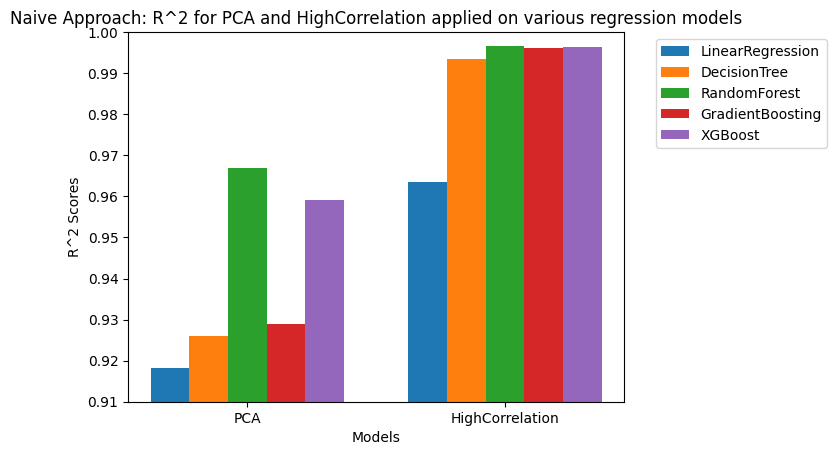

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Scores from my models
linear_regression_scores = [pca_lin_model_score, lin_model_score]  # Scores for PCA and HighCorrelation
decision_tree_scores = [pca_decision_model_score, decision_model_score]
random_forest_scores = [pca_forest_model_score, forest_model_score]
gradient_boosting_scores = [pca_grad_boost_model_score, grad_boost_model_score]
xgboost_scores = [pca_xgb_model_score, xgb_model_score]

# Bar positions
bar_width = 0.15
index = np.arange(len(linear_regression_scores))

# Creating the bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(index, linear_regression_scores, bar_width, label='LinearRegression')
bar2 = ax.bar(index + bar_width, decision_tree_scores, bar_width, label='DecisionTree')
bar3 = ax.bar(index + 2 * bar_width, random_forest_scores, bar_width, label='RandomForest')
bar4 = ax.bar(index + 3 * bar_width, gradient_boosting_scores, bar_width, label='GradientBoosting')
bar5 = ax.bar(index + 4 * bar_width, xgboost_scores, bar_width, label='XGBoost')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('R^2 Scores')
ax.set_title('Naive Approach: R^2 for PCA and HighCorrelation applied on various regression models')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(['PCA', 'HighCorrelation'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(0.91, 1.0)

# Show the bar graph
plt.show()

## Generate Graph Showcasing Model's RMSE (PCA / High Correlation)

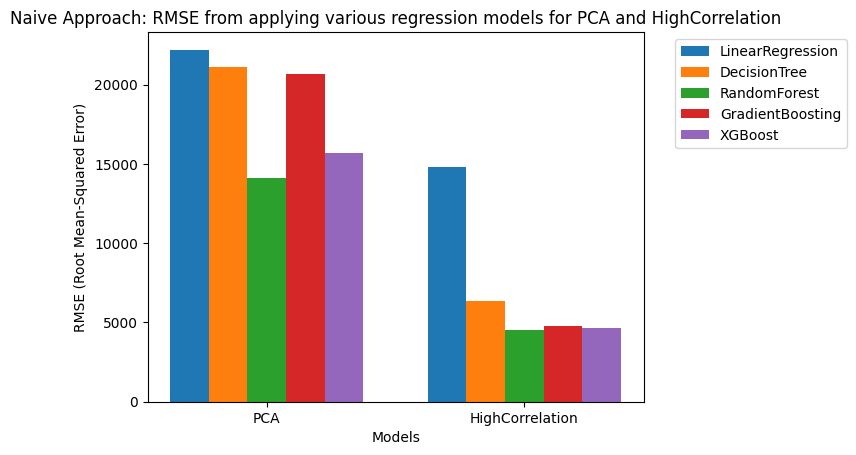

In [9]:
import matplotlib.pyplot as plt
import numpy as np

linear_regression_rmses = [pca_lin_model_rmse, lin_model_rmse]  # Scores for PCA and HighCorrelation
decision_tree_rmses = [pca_decision_model_rmse, decision_model_rmse]
random_forest_rmses = [pca_forest_model_rmse, forest_model_rmse]
gradient_boosting_rmses = [pca_grad_boost_model_rmse, grad_boost_model_rmse]
xgboost_rmses = [pca_xgb_model_rmse, xgb_model_rmse]

# Bar positions
bar_width = 0.15
index = np.arange(len(linear_regression_rmses))

# Creating the bar graph
fig, ax = plt.subplots()
bar1 = ax.bar(index, linear_regression_rmses, bar_width, label='LinearRegression')
bar2 = ax.bar(index + bar_width, decision_tree_rmses, bar_width, label='DecisionTree')
bar3 = ax.bar(index + 2 * bar_width, random_forest_rmses, bar_width, label='RandomForest')
bar4 = ax.bar(index + 3 * bar_width, gradient_boosting_rmses, bar_width, label='GradientBoosting')
bar5 = ax.bar(index + 4 * bar_width, xgboost_rmses, bar_width, label='XGBoost')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE (Root Mean-Squared Error)')
ax.set_title('Naive Approach: RMSE from applying various regression models for PCA and HighCorrelation')
ax.set_xticks(index + 2 * bar_width)
ax.set_xticklabels(['PCA', 'HighCorrelation'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the bar graph
plt.show()

In [27]:
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import logging

pca_10principal_COLS = pca_10principal.drop(columns=['Unnamed: 0'])
high_correlations_COLS = high_correlations.drop(columns=['Unnamed: 0'])

def generate_column_combinations(column_list):
    all_combinations = []
    for r in range(1, len(column_list) + 1):
        column_combinations = combinations(column_list, r)
        all_combinations.extend(column_combinations)
    return all_combinations

pca_col_combinations_list = generate_column_combinations(pca_10principal_COLS.columns)
high_corr_combinations_list = generate_column_combinations(high_correlations_COLS.columns)

# Setup logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='col_combinations_random_forest_test.log', encoding='utf-8')
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

logging.info("BEGIN PCA COLUMN COMBINATIONS - RANDOM FOREST MODEL TEST")

for combination in pca_col_combinations_list:
    pca_combination_col = pca_10principal_COLS[list(combination)]
    X_train, X_test, y_train, y_test = train_test_split(pca_combination_col, target_variable, test_size=0.2, random_state=42)
    forest_model = RandomForestRegressor()
    forest_model.fit(X_train, y_train)
    pca_combination_col_score = forest_model.score(X_test, y_test)
    pca_combination_col_rmse = root_mean_squared_error(forest_model.predict(X_test), y_test)
    logging.debug(f"{list(combination)}, {pca_combination_col_score}, {pca_combination_col_rmse}")
  
logging.info("BEGIN HIGH CORRELATION COLUMN COMBINATIONS - RANDOM FOREST MODEL TEST")

for combination in high_corr_combinations_list:
    high_corr_combination_col = high_correlations_COLS[list(combination)]
    X_train, X_test, y_train, y_test = train_test_split(high_corr_combination_col, target_variable, test_size=0.2, random_state=42)
    forest_model = RandomForestRegressor()
    forest_model.fit(X_train, y_train)
    high_corr_combination_col_score = forest_model.score(X_test, y_test)
    high_corr_combination_col_rmse = root_mean_squared_error(forest_model.predict(X_test), y_test)
    logging.debug(f"{list(combination)}, {high_corr_combination_col_score}, {high_corr_combination_col_rmse}")

INFO:root:BEGIN PCA COLUMN COMBINATIONS - RANDOM FOREST MODEL TEST


DEBUG:root:['PCA_1'], 0.24403129135862667, 67522.63877443259
DEBUG:root:['PCA_2'], 0.19962678584990456, 69477.43383781482


KeyboardInterrupt: 